In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd

In [35]:
nb_of_clusters = 5 # Nombre de clusters
nb_of_samples = 200 # Nombre de points
dataset, _ = datasets.make_blobs(n_samples=nb_of_samples, centers=nb_of_clusters, n_features=2) # Generation de donnees aleatoires en 2D

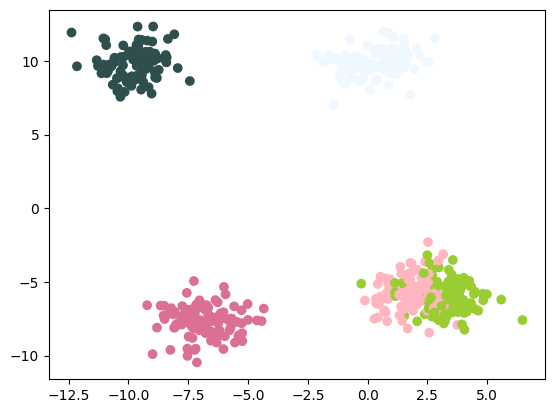

In [16]:
def visualize_clustersV1(dataset, centers=None, title=None):

    colors = list(mcolors.CSS4_COLORS.keys()) # Liste des couleurs CSS4_COLORS
    plt.scatter(dataset[:, 0], dataset[:, 1], c=_, cmap=mcolors.ListedColormap(colors))  # Affichage des donnees avec une couleur par cluster

    if centers is not None: # Si les centres des clusters sont fournis, on les affiche
        plt.scatter(centers[:, 0], centers[:, 1], c='red') # Affichage des centres des clusters
    plt.show() # Affichage du graphique


visualize_clustersV1(dataset) # Affichage des donnees sans les clusters

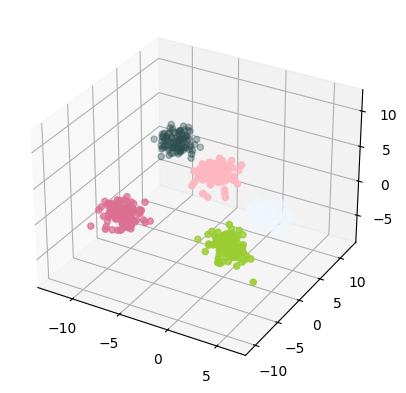

In [17]:
def visualize_clustersV1_3D(dataset, centers=None, title=None):
    fig = plt.figure()  # Création d'une figure
    ax = fig.add_subplot(111, projection='3d')  # Ajout d'un subplot 3D

    colors = list(mcolors.CSS4_COLORS.keys())  # Liste des couleurs CSS4_COLORS

    ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=_, cmap=mcolors.ListedColormap(colors)) # Affichage des données avec une couleur par cluster

    plt.show()  # Affichage du graphique
visualize_clustersV1_3D(dataset)  # Remplacez `dataset` par votre ensemble de données 3D


In [18]:

def sse_distance(a, b):
    """
    Cette fonction calcule la distance entre deux points a et b
    en utilisant la somme des erreurs au carré (SSE)
    """

    return np.sum((np.array(a) - np.array(b))**2) # On retourne la somme des erreurs au carré

def find_closest_center(centers, data):
    """
    Cette fonction trouve le centre optimal dans une liste de centres pour un point donné

    Keyword arguments:
    centers -- liste des centres
    data -- point dont on cherche le centre le plus proche
    Return: l'index du centre le plus proche
    """

    distances = [] # Liste des distances entre le point et les centres
    for center in centers: # Pour chaque centre
        distances.append(sse_distance(center, data)) # On calcule la distance entre le point et le centre
    return np.argmin(distances) # On retourne l'index du centre le plus proche

def compute_clusters(centers, data):
    """
    Cette fonction calcule les clusters pour chaque point de la liste de nos données

    Keyword arguments:
    centers -- liste des centres
    data -- liste des points
    Return: liste des clusters
    """

    clusters = [] # Liste des clusters
    for point in data: # Pour chaque point
        clusters.append(find_closest_center(centers, point)) # On trouve le centre le plus proche et on l'ajoute à la liste des clusters
    return clusters # On retourne la liste des clusters

def sse_error(centers, data):
    """
    Cette fonction calcule l'erreur SSE

    Keyword arguments:
    centers -- liste des centres
    data -- liste des points
    Return: l'erreur SSE
    """

    clusters = compute_clusters(centers, data) # On calcule les clusters
    error = 0 # Erreur SSE initiale à 0
    for i in range(len(clusters)): # Pour chaque cluster
        error += sse_distance(data[i], centers[clusters[i]]) # On ajoute la distance entre le point et le centre du cluster
    return error # On retourne l'erreur SSE


In [19]:
def visualize_clusters(dataset, centers=None, title=None):
    """
    Cette fonction permet de visualiser les clusters et les centres des clusters en 2D ou 3D.

    Keyword arguments:
    dataset -- ensemble de données de points
    centers -- centres des clusters
    title -- titre du graphique

    Return: None
    """

    colors = list(mcolors.CSS4_COLORS.keys()) # Liste des couleurs CSS4_COLORS
    if dataset.shape[1] == 2: # Si les données sont en 2D
        plt.scatter(dataset[:, 0], dataset[:, 1], c=_, cmap=mcolors.ListedColormap(colors)) # Affichage des données avec une couleur par cluster
    elif dataset.shape[1] == 3: # Si les données sont en 3D
        fig = plt.figure() # Création d'une figure
        ax = fig.add_subplot(111, projection='3d') # Ajout d'un subplot 3D
        ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=_, cmap=mcolors.ListedColormap(colors)) # Affichage des données avec une couleur par cluster
    else: # Si les données sont en plus de 3D
        raise ValueError("Visualization not implemented for more than 3 dimensions") # Erreur si les données sont en plus de 3D

    if centers is not None: # Si les centres des clusters sont fournis, on les affiche
        if centers.shape[1] == 2: # Si les centres des clusters sont en 2D
            plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100) # Affichage des centres des clusters
        elif centers.shape[1] == 3: # Si les centres des clusters sont en 3D
            ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100) # Affichage des centres des clusters
        else: # Si les centres des clusters sont en plus de 3D
            raise ValueError("Visualization not implemented for more than 3 dimensions") # Erreur si les centres des clusters sont en plus de 3D

    plt.show() # Affichage du graphique

In [20]:
def initialize_centers(data, k):
    """
    Cette fonction permet d'initialiser les centres des clusters

    Keyword arguments:
    data -- Dataset à utiliser pour initialiser les centres
    k -- Nombre de clusters
    Return: liste des centres des clusters
    """

    indices = np.random.choice(len(data), k, replace=False) # Sélectionner k indices aléatoires
    centers = data[indices] # Récupérer les points correspondants aux indices
    return centers # Retourner la liste des centres des clusters

In [21]:
def initialize_centers_plus(data, k):
    """
    Cette fonction initialise les centres des clusters en utilisant l'algorithme K-means ++

    Keyword arguments:
    data -- liste des points
    k -- nombre de clusters
    Return: liste des centres
    """

    centers = [] # Liste des centres
    centers.append(data[np.random.randint(0, len(data))]) # Sélectionner aléatoirement le premier centre parmi les points de données

    for _ in range(1, k): # Pour chaque centre restant
        distances = [] # Liste des distances entre le point et les centres
        for point in data: # Pour chaque point
            min_distance = min(sse_distance(point, c) for c in centers) # Pour chaque point, calculer la distance au centre le plus proche déjà choisi
            distances.append(min_distance) # Ajouter la distance à la liste des distances

        probabilities = np.array(distances) / sum(distances) # Probabilité proportionnelle à la distance au centre le plus proche déjà choisi
        new_center_index = np.random.choice(len(data), p=probabilities)  # Choisir le nouveau centre avec une probabilité proportionnelle à la distance au centre déjà choisi
        centers.append(data[new_center_index]) # Ajouter le nouveau centre à la liste des centres

    return np.array(centers) # On retourne la liste des centres

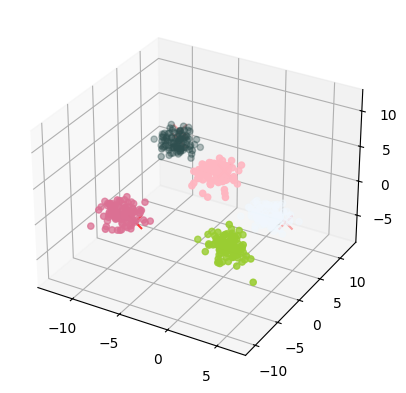

In [22]:
visualize_clusters(dataset, np.array(initialize_centers(dataset, nb_of_clusters))) # Initialisation aléatoire

Iteration 1, SSE = 1675.6212467304592


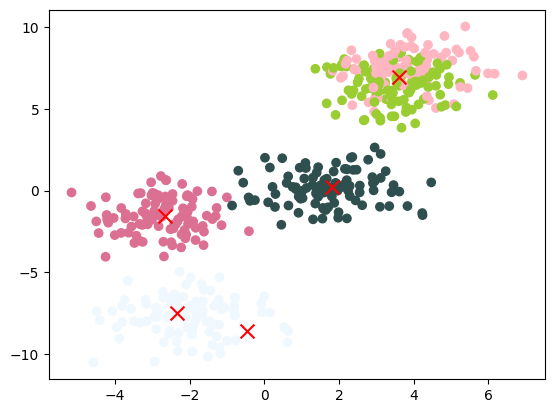

Iteration 2, SSE = 1065.760363499558


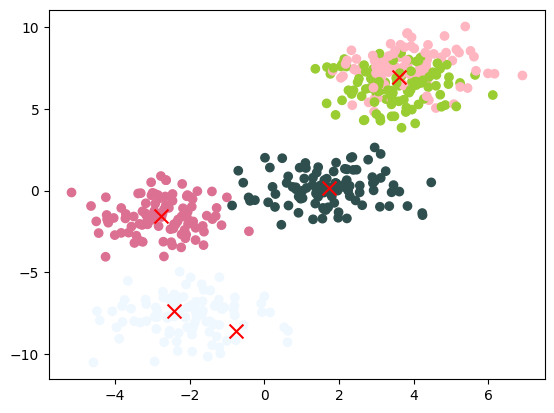

Iteration 3, SSE = 1056.5261042084658


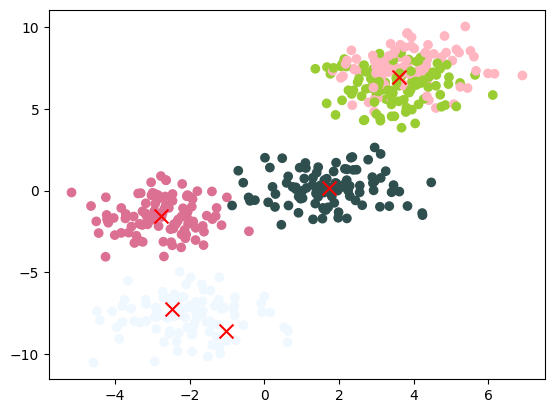

Iteration 4, SSE = 1051.4096750863423


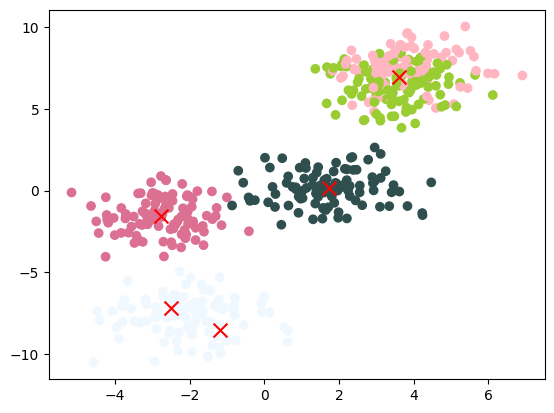

Iteration 5, SSE = 1049.3023130056997


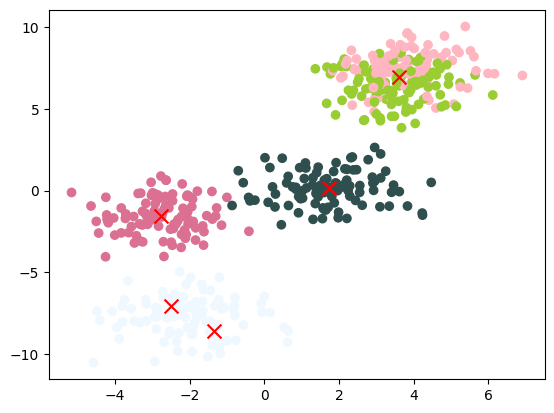

Iteration 6, SSE = 1047.5035633564116


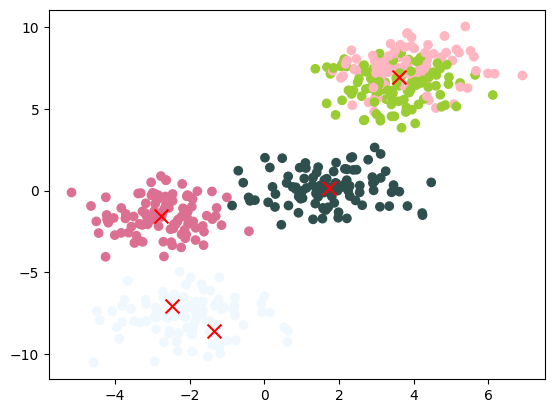

Convergence atteinte après 6 itérations.


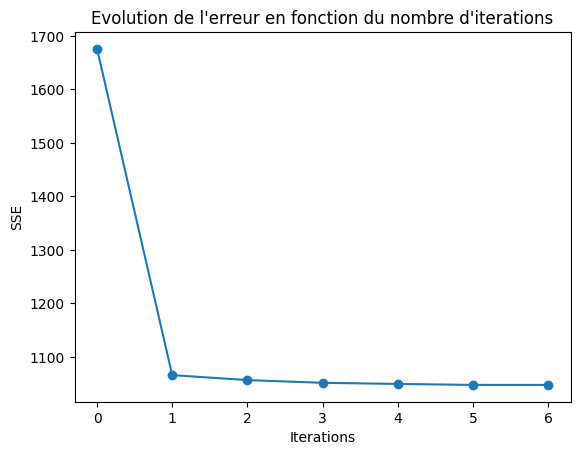

In [28]:
def kmeans(data, k, num_it):
    """
    Cette fonction permet d'effectuer l'algorithme KMEANS

    Keyword arguments:
    data -- Dataset à utiliser pour initialiser les centres
    k -- Nombre de clusters
    num_it -- Nombre d'itérations

    Return: historique des centres et historique de SSE
    """

    centers_history = [] # Historique des centres des clusters
    sse_history = [] # Historique de l'erreur SSE
    tolerance=1 # Tolerance pour la convergence

    #centers = initialize_centers(data, k) # Initialisation des centres
    centers = initialize_centers_plus(data, k) # Initialisation des centres avec K-means ++

    for i in range(num_it): # Pour chaque itération
        centers_history.append(np.array(centers)) # Ajout des centres à l'historique
        clusters = compute_clusters(centers, data) # Attribution des clusters
        sse = sse_error(centers, data) # Calcul du SSE
        sse_history.append(sse) # Ajout du SSE à l'historique

        # Mise à jour des centres
        new_centers = [] # Nouveaux centres
        for cluster_id in range(k): # Pour chaque cluster
            cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id]) # Récupération des points du cluster
            new_centers.append(np.mean(cluster_points, axis=0)) # Calcul du nouveau centre

        if i > 0 and abs(sse_history[i-1] - sse) < tolerance: # Si les centres n'ont pas changé, on a atteint la convergence
            print(f"Convergence atteinte après {i} itérations.") # Affichage du nombre d'itérations
            break

        centers = new_centers # Mise à jour des centres
        print(f"Iteration {i+1}, SSE = {sse}") # Affichage de l'itération et du SSE
        visualize_clusters(data, np.array(centers)) # Affichage des clusters


    # Dernière mise à jour des centres et SSE
    clusters = compute_clusters(centers, data)
    sse = sse_error(centers, data)
    centers_history.append(np.array(centers))
    sse_history.append(sse)


    # Affichage de l'évolution de l'erreur en fonction du nombre d'itérations
    plt.plot(range(i+1), sse_history[:-1], marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.title('Evolution de l\'erreur en fonction du nombre d\'iterations')
    plt.show()

    # Retourne l'historique des centres et l'historique de SSE
    history = {'centers_history': centers_history, 'sse_history': sse_history}
    return history


h = kmeans(dataset,nb_of_clusters, 100) # Appel de la fonction kmeans

Iteration 1, SSE=511.5855411559414
Iteration 2, SSE=189.95000441725892
Iteration 3, SSE=137.19840776200894
Iteration 4, SSE=110.56283952029129
Iteration 5, SSE=129.24198402913913
Iteration 6, SSE=76.70010897201387
Iteration 7, SSE=128.1882869484427
Iteration 8, SSE=102.40155361050702
Iteration 9, SSE=135.2853338145666
Iteration 10, SSE=120.37780611482438
Iteration 11, SSE=98.2334212975211
Iteration 12, SSE=120.60636232210517
Iteration 13, SSE=106.97308456566984
Iteration 14, SSE=92.11737625087963
Iteration 15, SSE=119.80538476298412
Iteration 16, SSE=105.76935238024029
Iteration 17, SSE=83.54980308912891
Iteration 18, SSE=96.08488701160614
Iteration 19, SSE=64.78479536395486
Iteration 20, SSE=98.10653075128137
Iteration 21, SSE=101.58042947214192
Iteration 22, SSE=86.54758818755172
Iteration 23, SSE=129.88671543433347
Iteration 24, SSE=104.13563654477925
Iteration 25, SSE=150.00140109423882
Iteration 26, SSE=63.49471839072853
Iteration 27, SSE=132.42028949903968
Iteration 28, SSE=94.93

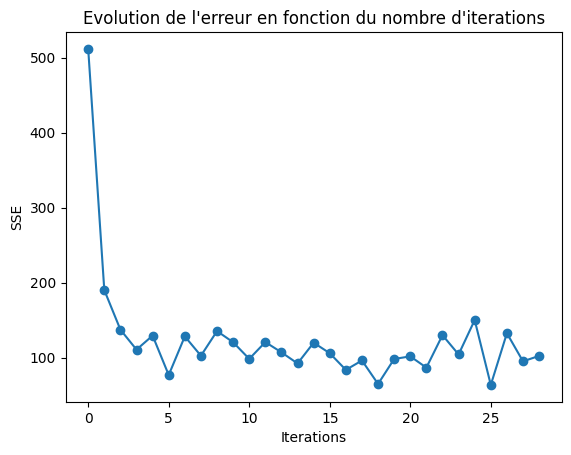

In [38]:
def miniBatch(data, k, num_it, batch_size=32):
    tolerance=1
    centers_history = []
    sse_history = []

    # Initialisation des centres
    centers = initialize_centers(data, k)

    for i in range(num_it):
        centers_history.append(np.array(centers))

        # Selectionner un batch de donnees alatoirement
        batch_indices = np.random.choice(len(data), size=batch_size, replace=False)
        batch_data = data[batch_indices]

        # Attribution des clusters
        clusters = compute_clusters(centers, batch_data)

        # Calcul du SSE
        sse = sse_error(centers, batch_data)
        sse_history.append(sse)

        # Mise a jour des centres
        new_centers = []
        for cluster_id in range(k):

            # On recupere les points du batch qui appartiennent au cluster
            cluster_points = np.array([batch_data[j] for j in range(len(batch_data)) if clusters[j] == cluster_id])
            if len(cluster_points) > 0:
                new_centers.append(np.mean(cluster_points, axis=0))
            else:
                new_centers.append(centers[cluster_id])  # Si un cluster est vide, on garde l'ancien centre

        #  si la distance entre les nouveaux centres et les anciens centres est inferieure a la tolerance, on a atteint la convergence
        if np.linalg.norm(np.array(new_centers) - np.array(centers)) < tolerance:
            print(f"Convergence atteinte a l'iteration {i}")
            break
        centers = new_centers
        print(f"Iteration {i+1}, SSE={sse}")

        #visualize_clusters(data, np.array(centers))  # You can implement this function for visualization if needed

    # Dernière mise à jour des centres et SSE
    clusters = compute_clusters(centers, data)
    sse = sse_error(centers, data)
    centers_history.append(np.array(centers))
    sse_history.append(sse)

    # Affichage de l'évolution de l'erreur en fonction du nombre d'itérations
    plt.plot(range(i+1), sse_history[:-1], marker='o')

    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.title('Evolution de l\'erreur en fonction du nombre d\'iterations')
    plt.show()

    # Retourne l'historique des centres et l'historique de SSE
    history = {'centers_history': centers_history, 'sse_history': sse_history}
    return history


h = miniBatch(dataset, nb_of_clusters, 100, batch_size=30)